**Package installation**

In [23]:
!pip install geobr rtree
!pip install descartes

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


**Library import**

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
import geobr
import rtree
import folium

**Geobr library data verification**

In [25]:
geobr.list_geobr()

Function: read_country
Geographies available: Country
Years available: 1872, 1900, 1911, 1920, 1933, 1940, 1950, 1960, 1970, 1980, 1991, 2000, 2001, 2010, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020
Source: IBGE
------------------------------
Function: read_region
Geographies available: Region
Years available: 2000, 2001, 2010, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020
Source: IBGE
------------------------------
Function: read_state
Geographies available: States
Years available: 1872, 1900, 1911, 1920, 1933, 1940, 1950, 1960, 1970, 1980, 1991, 2000, 2001, 2010, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020
Source: IBGE
------------------------------
Function: read_meso_region
Geographies available: Meso region
Years available: 2000, 2001, 2010, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020
Source: IBGE
------------------------------
Function: read_micro_region
Geographies available: Micro region
Years available: 2000, 2001, 2010, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020

**Station points**

In [26]:
estaco = pd.DataFrame(
    {'City': ['Sao Paulo', 'Sao Paulo', 'Porto Alegre', 'Porto Alegre'],
    'Name': ['Mirante', 'Interlagos', 'Jardim Botanico', 'Belem Novo'],
    'Latitude': [-23.49638888, -23.724501, -30.05361111, -30.1861111],
    'Longitude': [-46.61999999, -46.677501, -51.17472221,  -51.17805554]})

points = gpd.GeoDataFrame(estaco, geometry=gpd.points_from_xy(estaco.Longitude, estaco.Latitude))
print(points.head())

points_sp = points[0:2]
print(points_sp)
points_poa = points[2:4]
print(points_poa)

           City             Name  ...  Longitude                     geometry
0     Sao Paulo          Mirante  ... -46.620000  POINT (-46.62000 -23.49639)
1     Sao Paulo       Interlagos  ... -46.677501  POINT (-46.67750 -23.72450)
2  Porto Alegre  Jardim Botanico  ... -51.174722  POINT (-51.17472 -30.05361)
3  Porto Alegre       Belem Novo  ... -51.178056  POINT (-51.17806 -30.18611)

[4 rows x 5 columns]
        City        Name   Latitude  Longitude                     geometry
0  Sao Paulo     Mirante -23.496389 -46.620000  POINT (-46.62000 -23.49639)
1  Sao Paulo  Interlagos -23.724501 -46.677501  POINT (-46.67750 -23.72450)
           City             Name  ...  Longitude                     geometry
2  Porto Alegre  Jardim Botanico  ... -51.174722  POINT (-51.17472 -30.05361)
3  Porto Alegre       Belem Novo  ... -51.178056  POINT (-51.17806 -30.18611)

[2 rows x 5 columns]


**Map São Paulo - São Paulo - (Mirante, Interlogos)**

<AxesSubplot: >

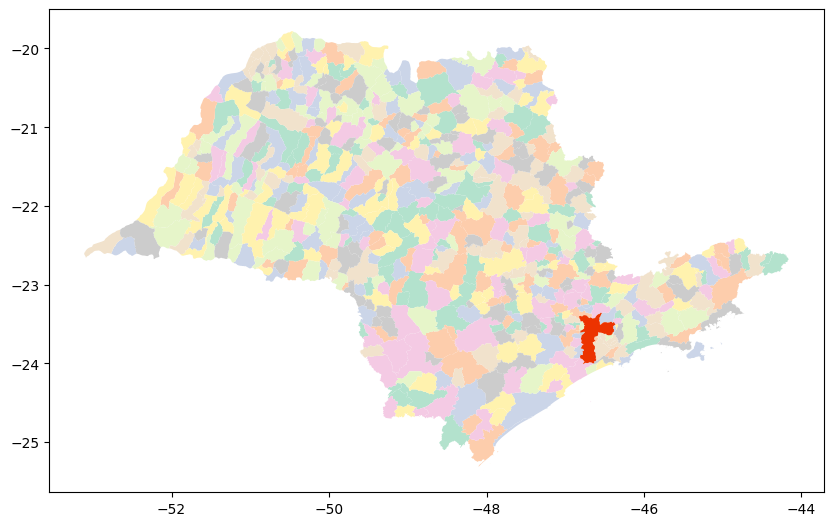

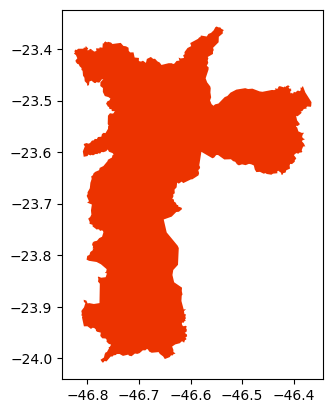

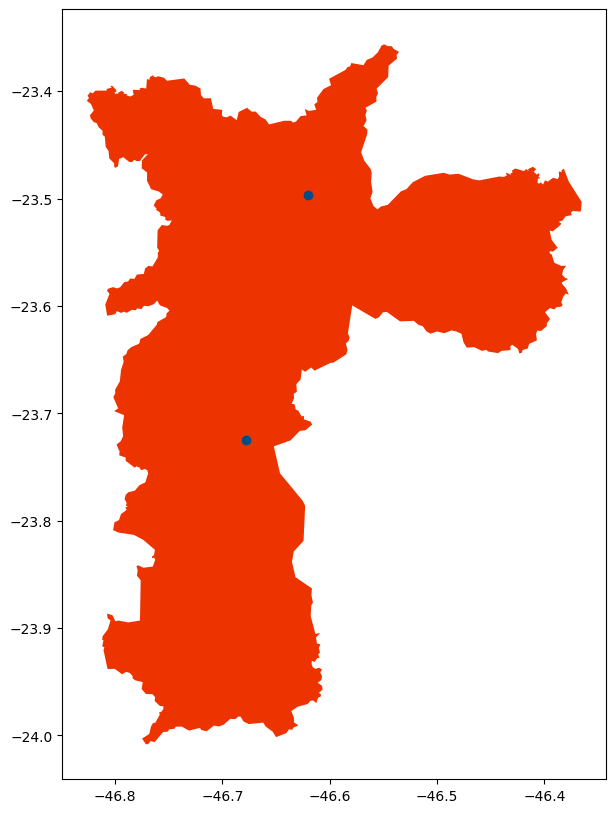

In [27]:
# Filtro para o estado de São Paulo
muni = geobr.read_municipality(code_muni='SP', year=2020)

# Filtrando a base para São Paulo
gdf_muni = muni[muni.name_muni == 'São Paulo']

# Plot estado SP e cidade São Paulo
fig, ax = plt.subplots(figsize=(10,10))
base = muni.plot(ax=ax, cmap='Pastel2')
gdf_muni.plot(ax=base, legend=True, color='#EC3300')

# Plot cidade São Paulo
gdf_muni.plot(color='#EC3300')

# Plot estação Mirante e Interlogo
fig, ax = plt.subplots(figsize=(10,10))
base = gdf_muni.plot(ax=ax, color='#EC3300')
points_sp.plot(ax=base, legend=True, color='#004D8A')

In [44]:
m = folium.Map(location=[-23.5475, -46.63611], zoom_start=12)

tooltip = "Click me!"

folium.Marker([estaco['Latitude'][0], estaco['Longitude'][0]], popup="<b>Mirante</b>", tooltip=tooltip).add_to(m)
folium.Marker([estaco['Latitude'][1], estaco['Longitude'][1]], popup="<b>Interlogos</b>", tooltip=tooltip).add_to(m)

m

**Map Rio Grande do Sul - Porto Alegre - (Jardim Botanico, Belem Novo)**

<AxesSubplot: >

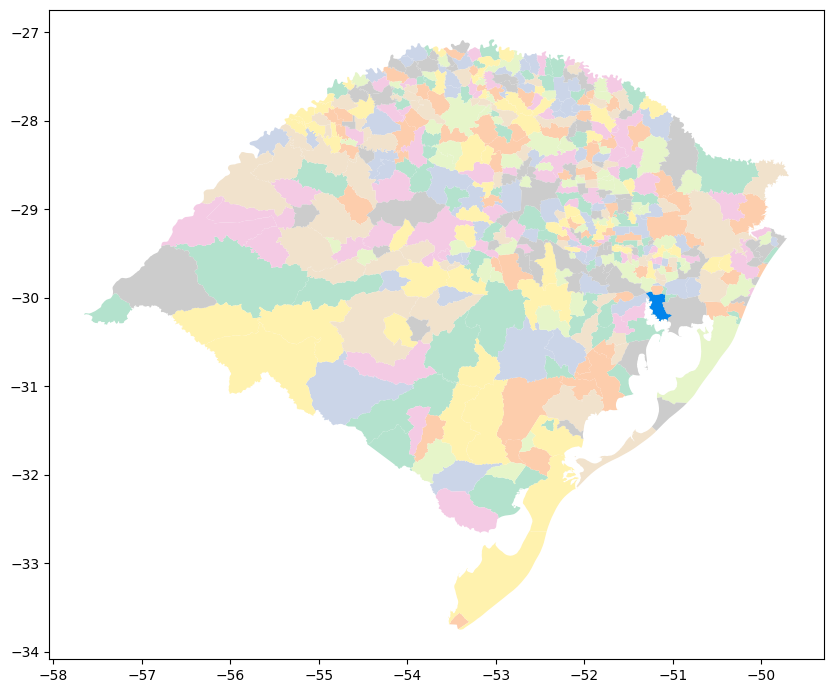

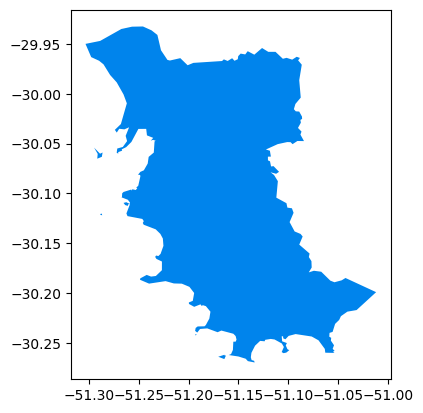

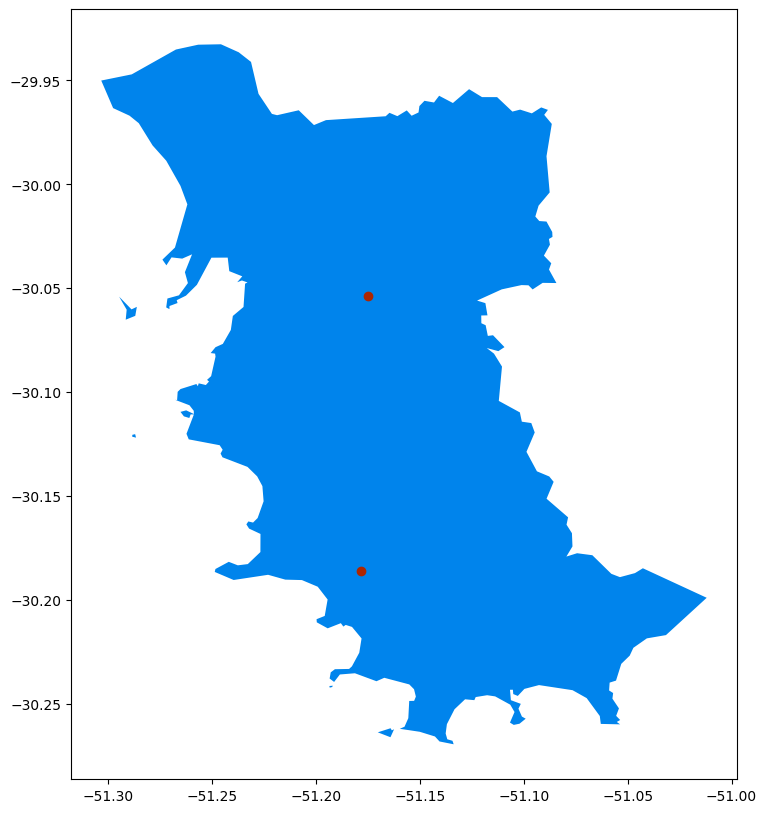

In [29]:
# Filtro para o estado de Rio Grande do Sul
muni = geobr.read_municipality(code_muni='RS', year=2020)

# Filtrando a base para Porto Alegre
gdf_muni = muni[muni.name_muni == 'Porto Alegre']

# Plot estado RS e cidade Porto Alegre
fig, ax = plt.subplots(figsize=(10,10))
base = muni.plot(ax=ax, cmap='Pastel2')
gdf_muni.plot(ax=base, legend=True, color='#0084EC')

# Plot cidade Porto Alegre
gdf_muni.plot(color='#0084EC')

# Plot estação Jardim Botanico e Belem Novo
fig, ax = plt.subplots(figsize=(10,10))
base = gdf_muni.plot(ax=ax, color='#0084EC')
points_poa.plot(ax=base, legend=True, color='#AD2601')

In [30]:
#MAPA DAS ESTAÇÕES DE FORMA INTERATIVAS
m = folium.Map(location=[-30.03283, -51.23019], zoom_start=12)

tooltip = "Click me!"

folium.Marker([estaco['Latitude'][2], estaco['Longitude'][2]], popup="<b>Jardim Botanico</b>", tooltip=tooltip).add_to(m)
folium.Marker([estaco['Latitude'][3], estaco['Longitude'][3]], popup="<b>Belem Novo</b>", tooltip=tooltip).add_to(m)

m

In [31]:
#TENTAR FAZER FOLIUM COM TEMPERATURAS


**Test temperatura**

In [32]:
gdf_muni.head()

,code_muni,name_muni,code_state,abbrev_state,name_state,code_region,name_region,geometry
325,4314902.0,Porto Alegre,43.0,RS,Rio Grande do Sul,4.0,Sul,"MULTIPOLYGON (((-51.16347 -30.26269, -51.16237..."


In [33]:
poa_JB = pd.read_csv("DADOS_ORIGINAIS_10-02-2023/POA_D10_JB.csv", sep=';', encoding="UTF-8", decimal=',', na_values=['null'])
poa_BN = pd.read_csv("DADOS_ORIGINAIS_10-02-2023/POA_D10_BN.csv", sep=';', encoding="UTF-8", decimal=',', na_values=['null'])

poa_JB.info()
poa_JB.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Data                  24 non-null     object 
 1   Hora (UTC)            24 non-null     int64  
 2   Temp. Ins. (C)        24 non-null     float64
 3   Temp. Max. (C)        24 non-null     float64
 4   Temp. Min. (C)        24 non-null     float64
 5   Umi. Ins. (%)         24 non-null     float64
 6   Umi. Max. (%)         24 non-null     float64
 7   Umi. Min. (%)         24 non-null     float64
 8   Pto Orvalho Ins. (C)  24 non-null     float64
 9   Pto Orvalho Max. (C)  24 non-null     float64
 10  Pto Orvalho Min. (C)  24 non-null     float64
 11  Pressao Ins. (hPa)    24 non-null     float64
 12  Pressao Max. (hPa)    24 non-null     float64
 13  Pressao Min. (hPa)    24 non-null     float64
 14  Vel. Vento (m/s)      24 non-null     float64
 15  Dir. Vento (m/s)      24 

,Data,Hora (UTC),Temp. Ins. (C),Temp. Max. (C),Temp. Min. (C),Umi. Ins. (%),Umi. Max. (%),Umi. Min. (%),Pto Orvalho Ins. (C),Pto Orvalho Max. (C),Pto Orvalho Min. (C),Pressao Ins. (hPa),Pressao Max. (hPa),Pressao Min. (hPa),Vel. Vento (m/s),Dir. Vento (m/s),Raj. Vento (m/s),Radiacao (KJ/m²),Chuva (mm)
0,10/02/2023,0,26.2,27.2,26.2,67.0,70.0,66.0,19.6,20.9,19.4,1006.1,1006.1,1005.4,2.2,114.0,6.4,NaN,0.0
1,10/02/2023,100,25.5,26.2,25.5,71.0,71.0,67.0,19.8,19.8,19.4,1006.5,1006.5,1006.1,1.5,103.0,6.6,NaN,0.0
2,10/02/2023,200,25.3,25.6,25.2,72.0,72.0,70.0,19.8,19.9,19.7,1006.3,1006.5,1006.2,1.3,86.0,4.8,NaN,0.0
3,10/02/2023,300,24.6,25.4,24.6,79.0,79.0,70.0,20.8,20.8,19.6,1006.3,1006.3,1006.0,1.8,110.0,4.3,NaN,0.0
4,10/02/2023,400,24.2,24.6,24.0,80.0,81.0,79.0,20.5,20.7,20.5,1006.0,1006.4,1006.0,0.6,105.0,4.3,NaN,0.0


In [34]:
poa_JB_Temp = poa_JB['Temp. Max. (C)']
print(min(poa_JB_Temp))
print(max(poa_JB_Temp))

22.8
35.4


0     27.2
1     26.2
2     25.6
3     25.4
4     24.6
5     24.2
6     23.9
7     23.5
8     23.2
9     22.8
10    25.3
11    28.0
12    29.0
13    30.8
14    32.7
15    32.8
16    34.0
17    35.0
18    34.6
19    35.4
20    34.3
21    32.5
22    30.9
23    28.7
Name: Temp. Max. (C), dtype: float64


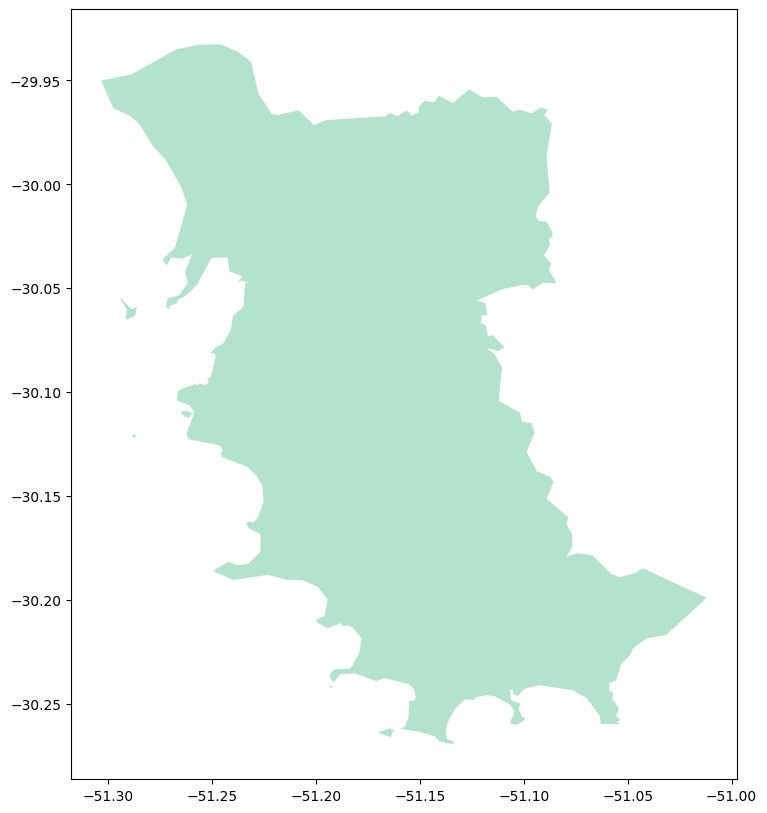

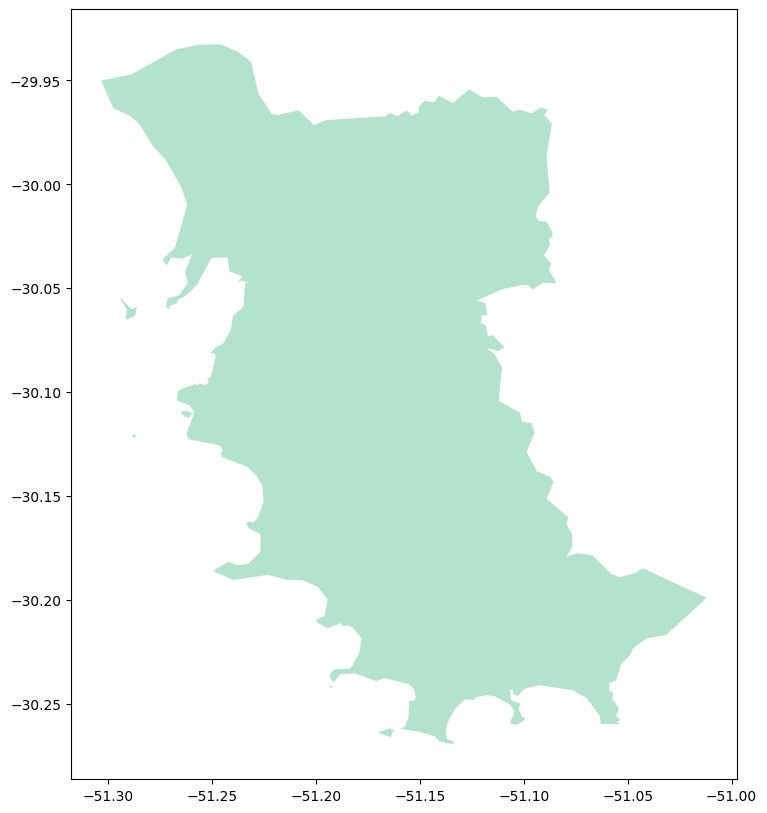

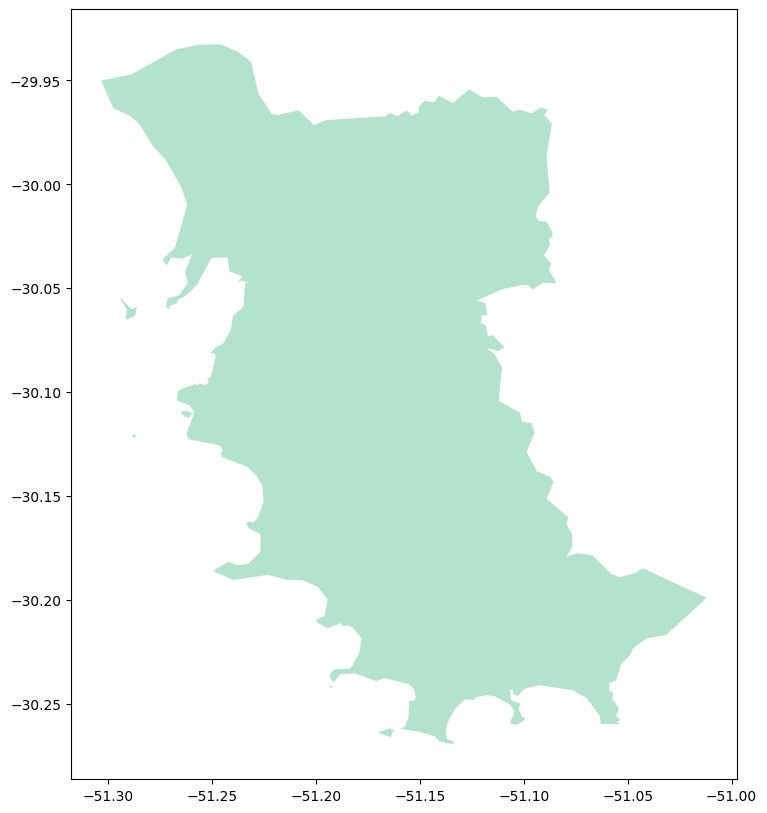

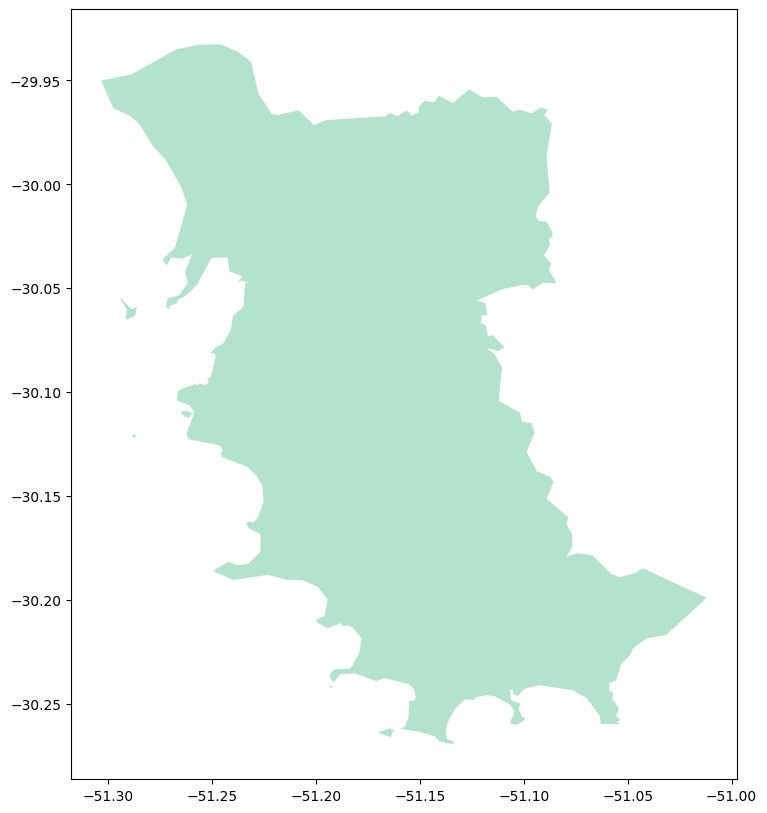

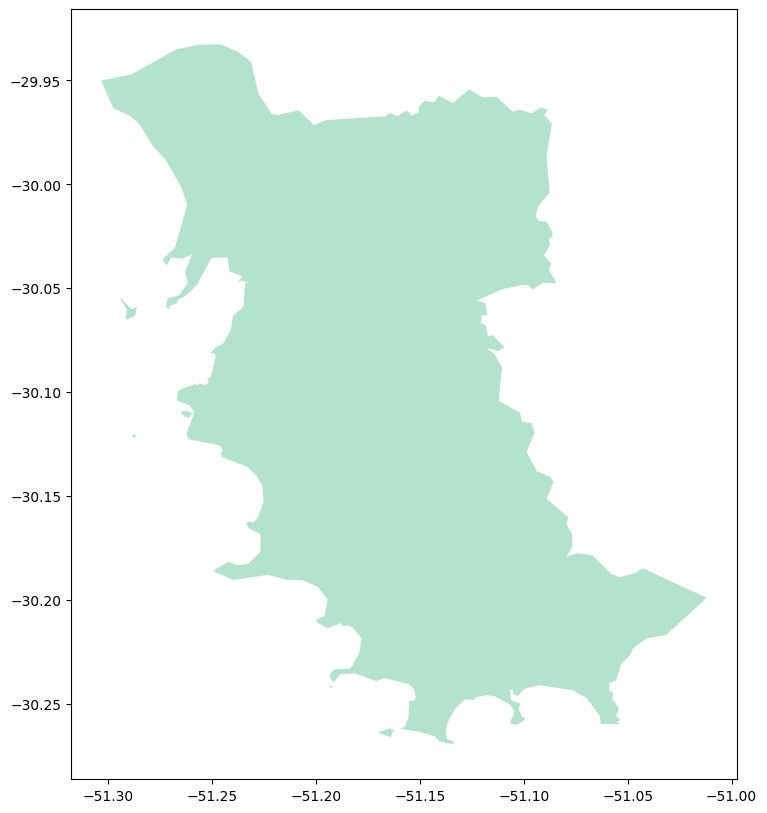

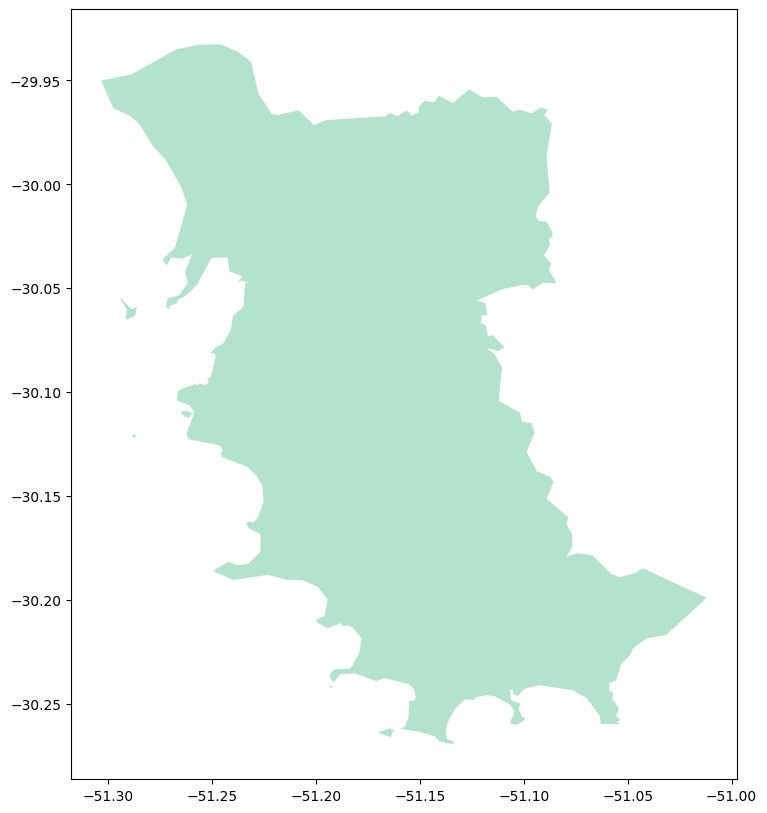

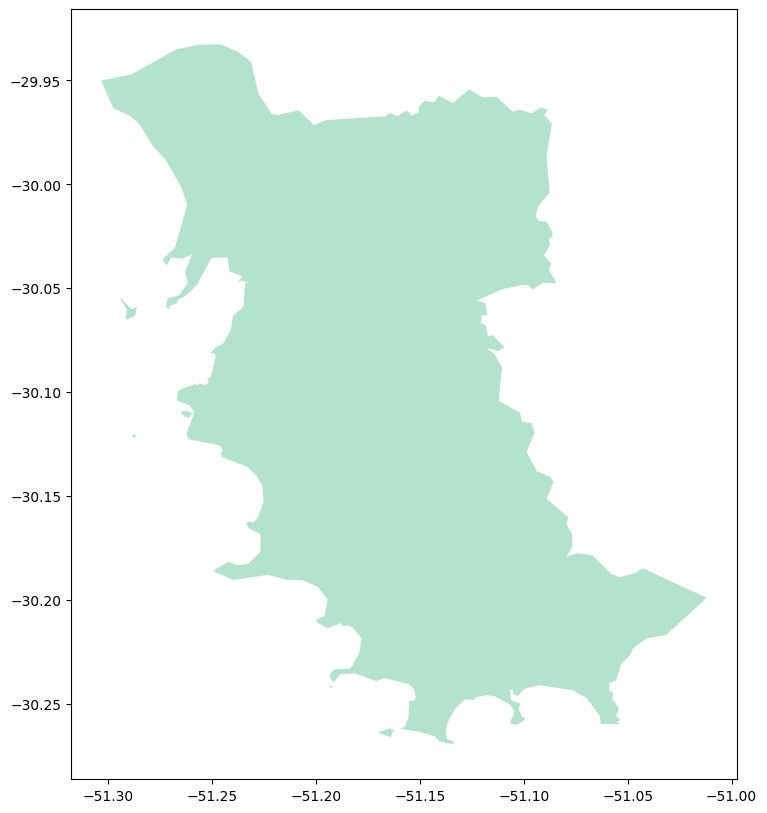

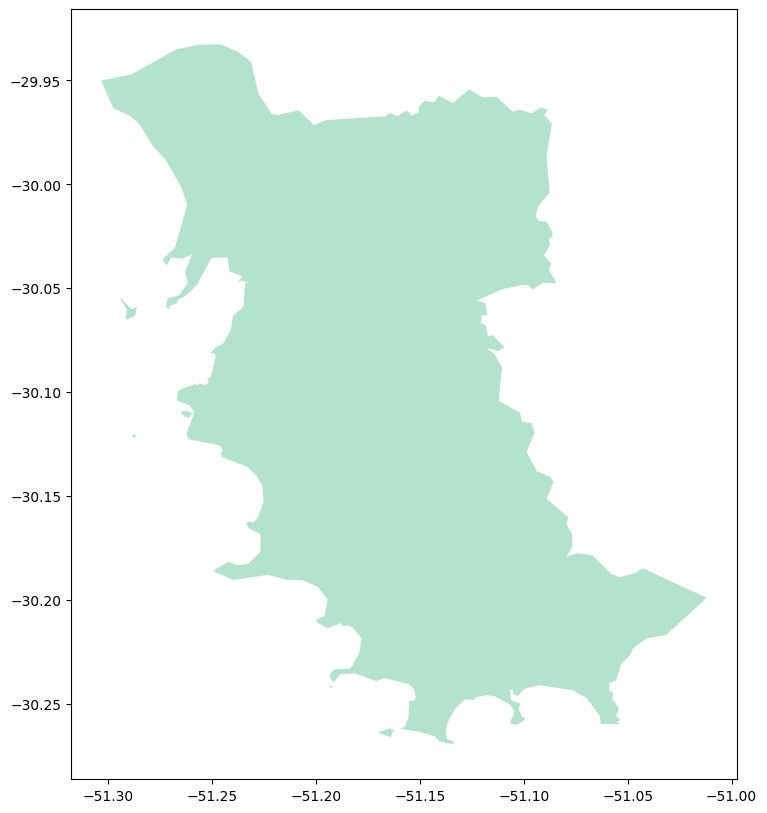

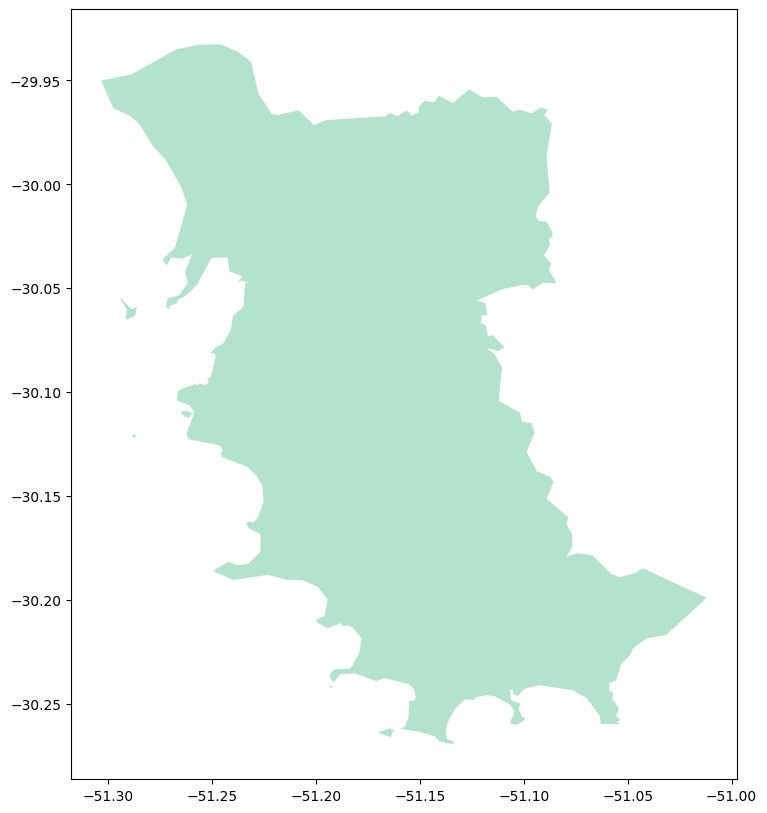

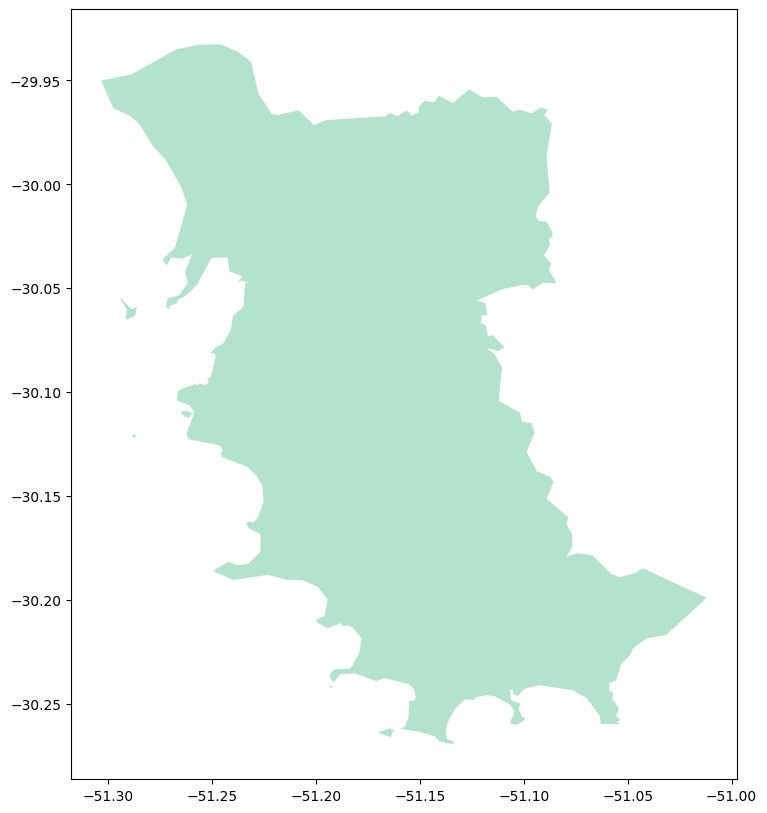

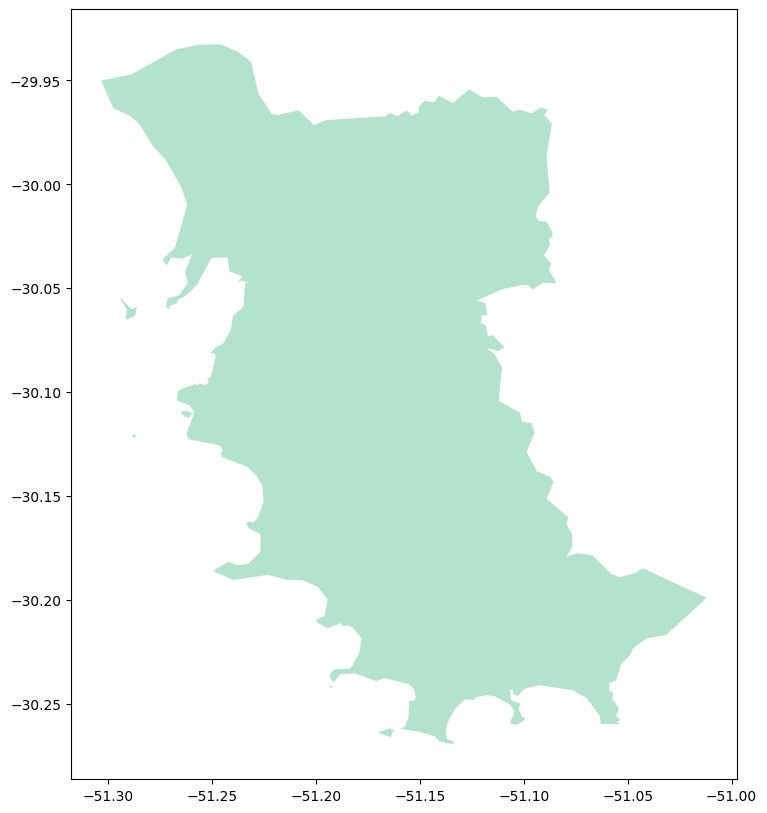

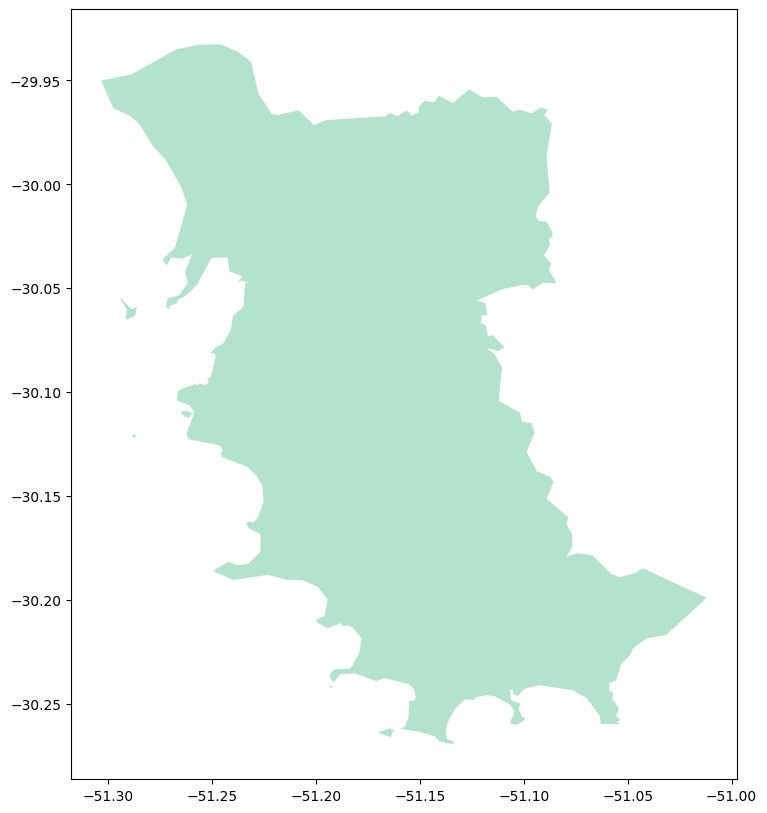

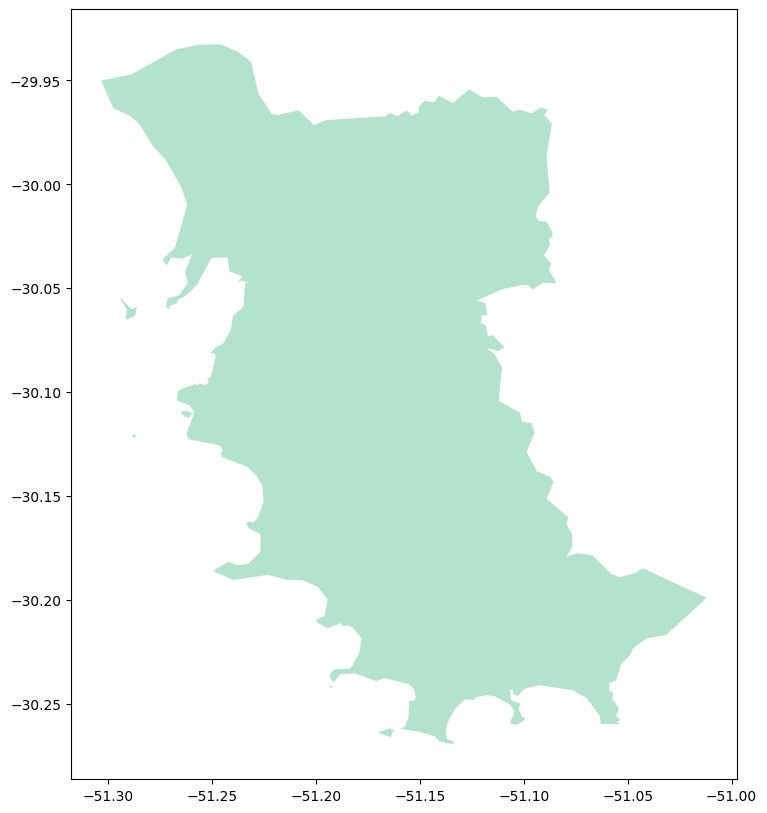

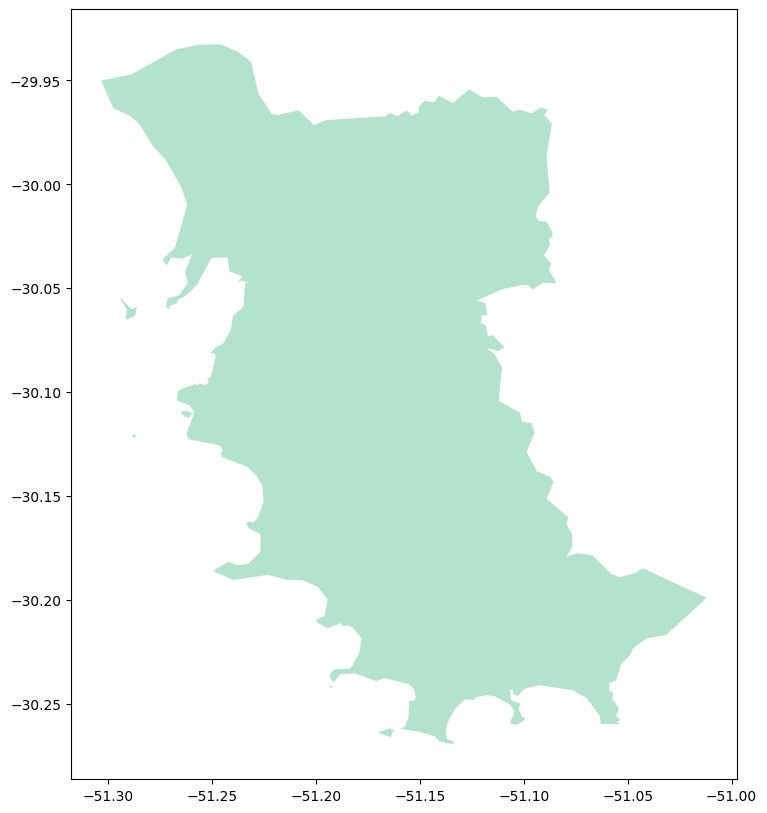

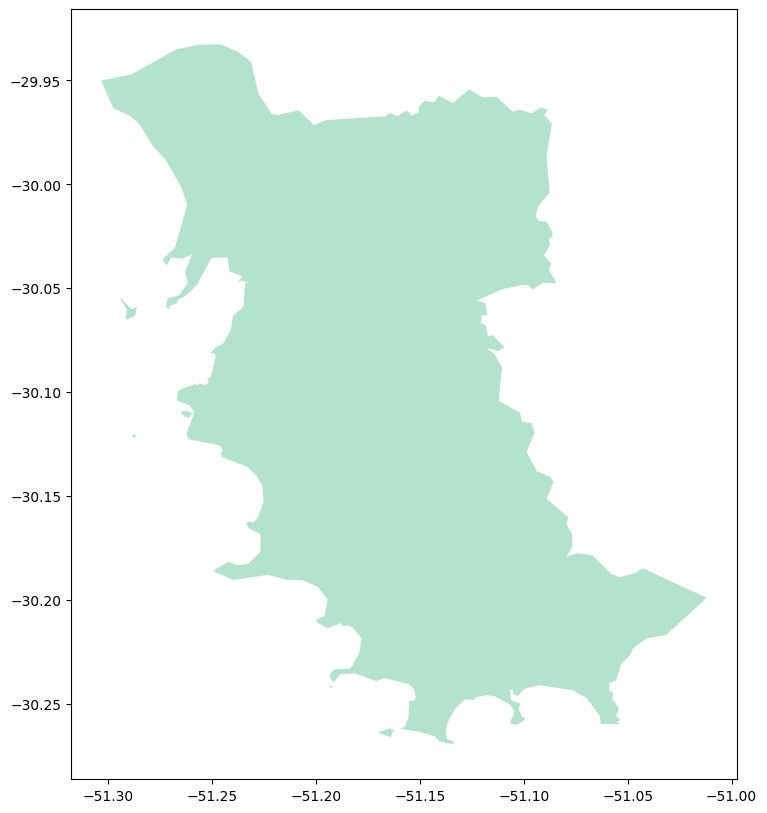

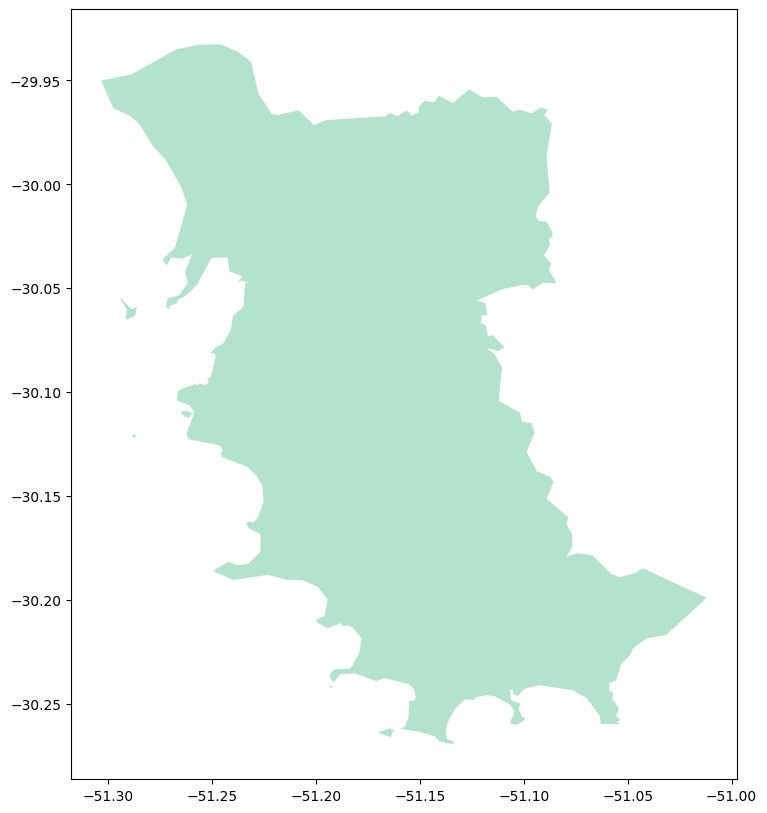

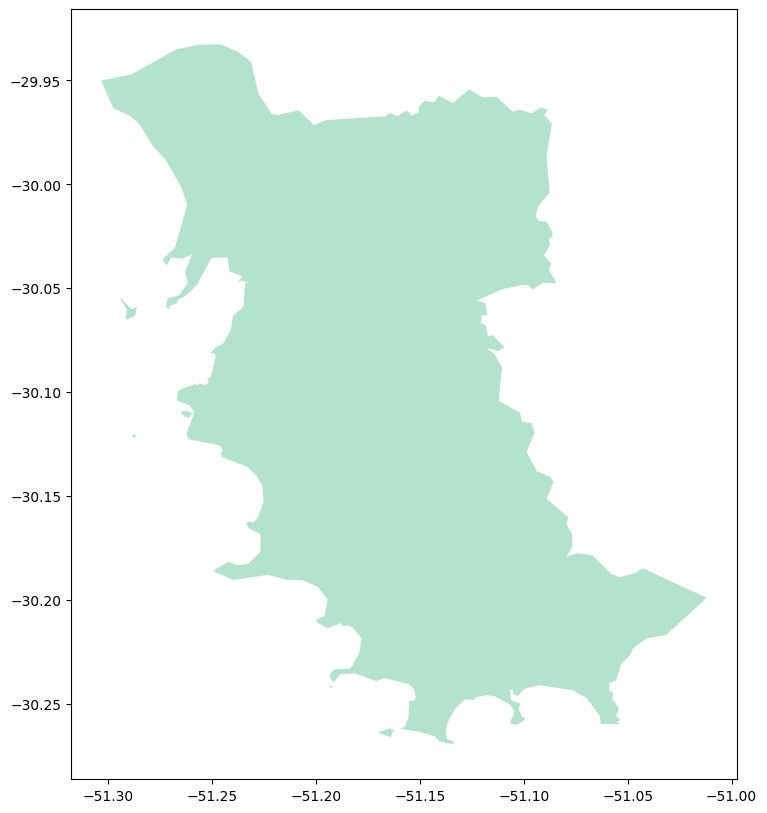

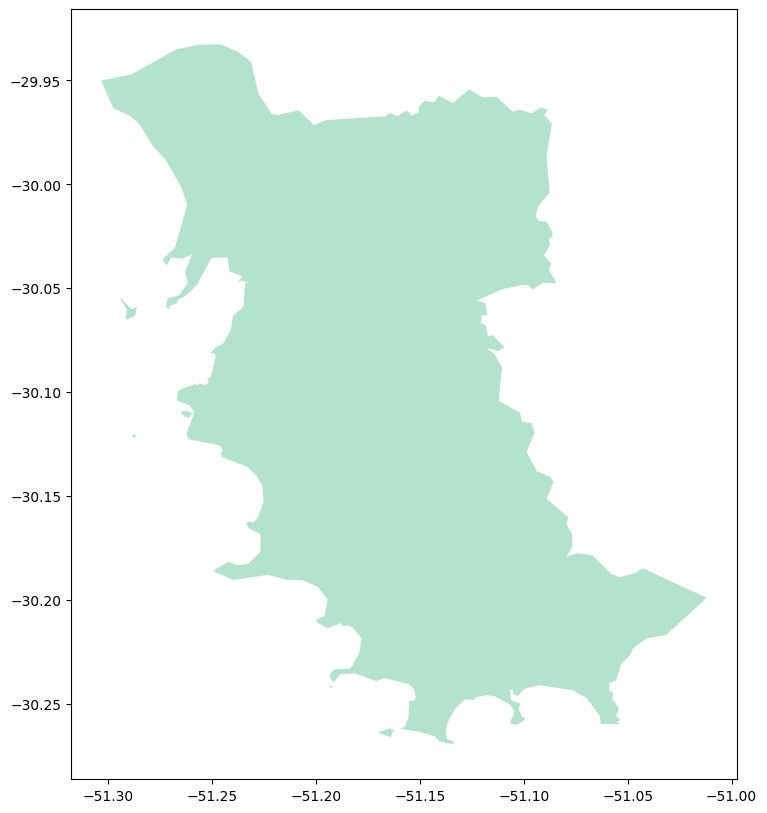

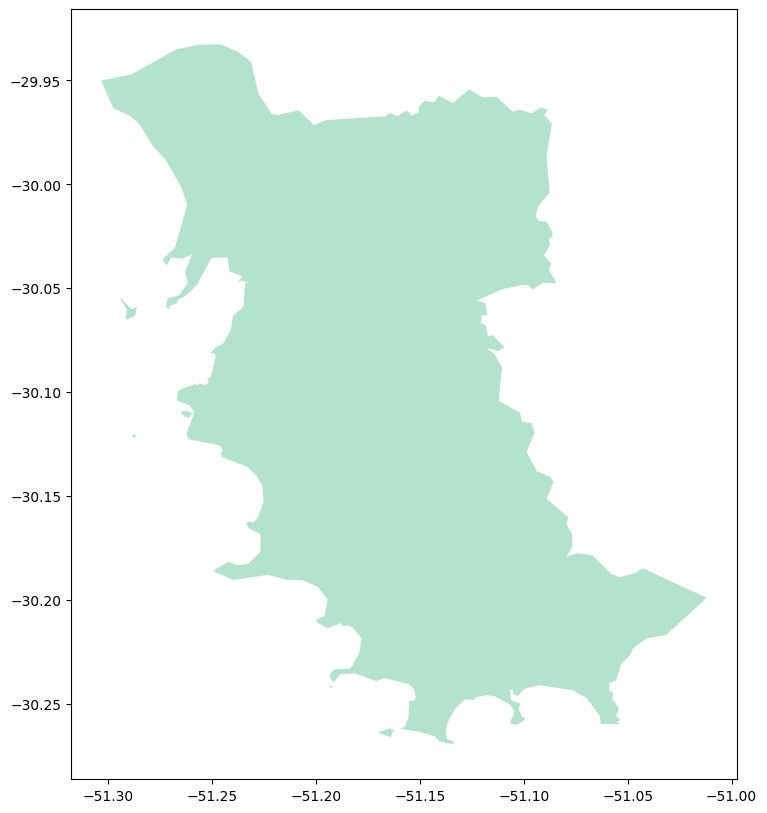

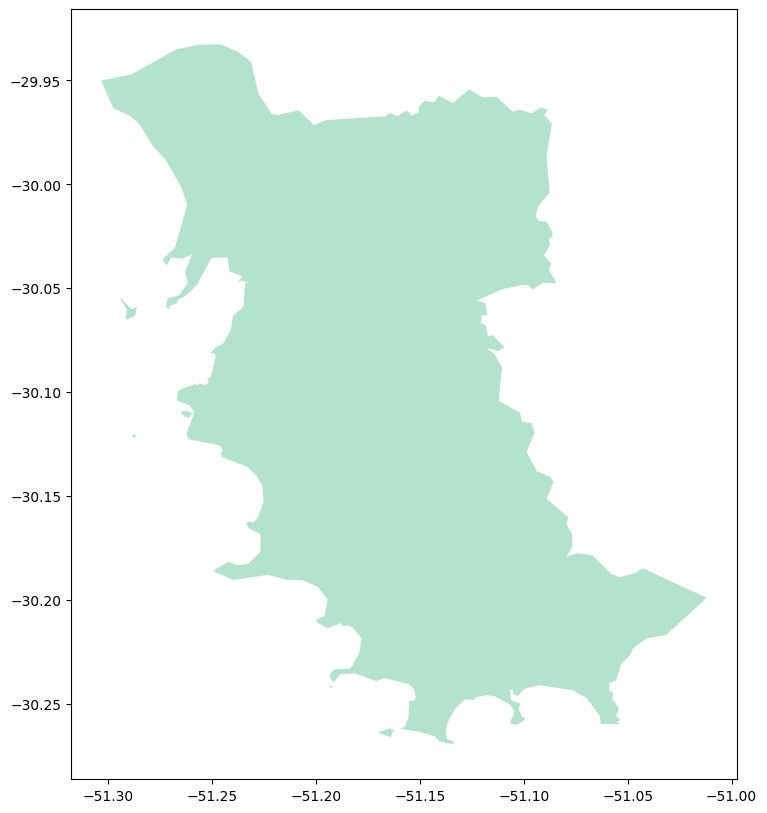

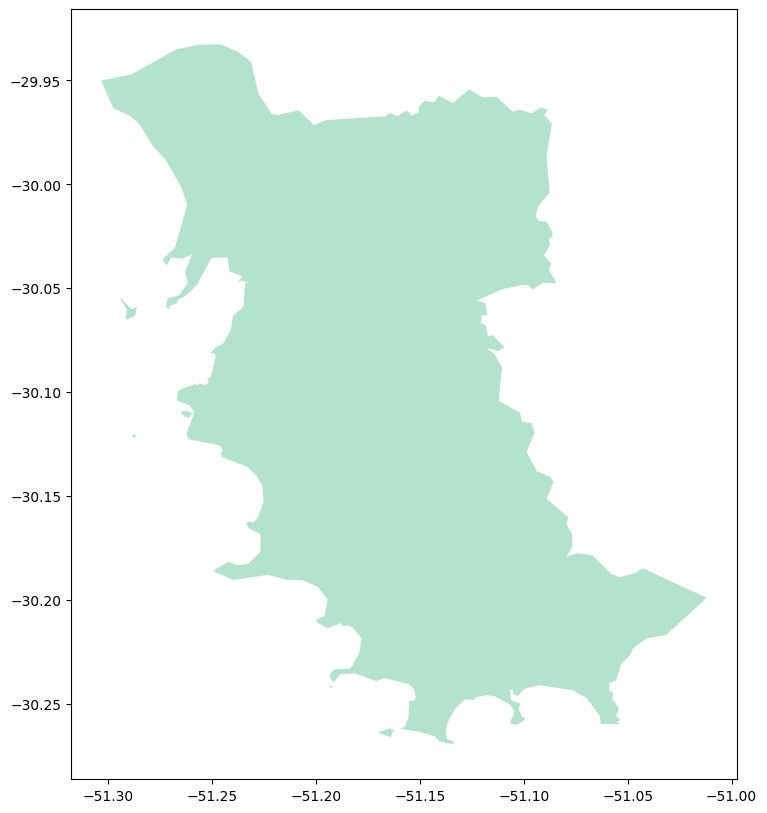

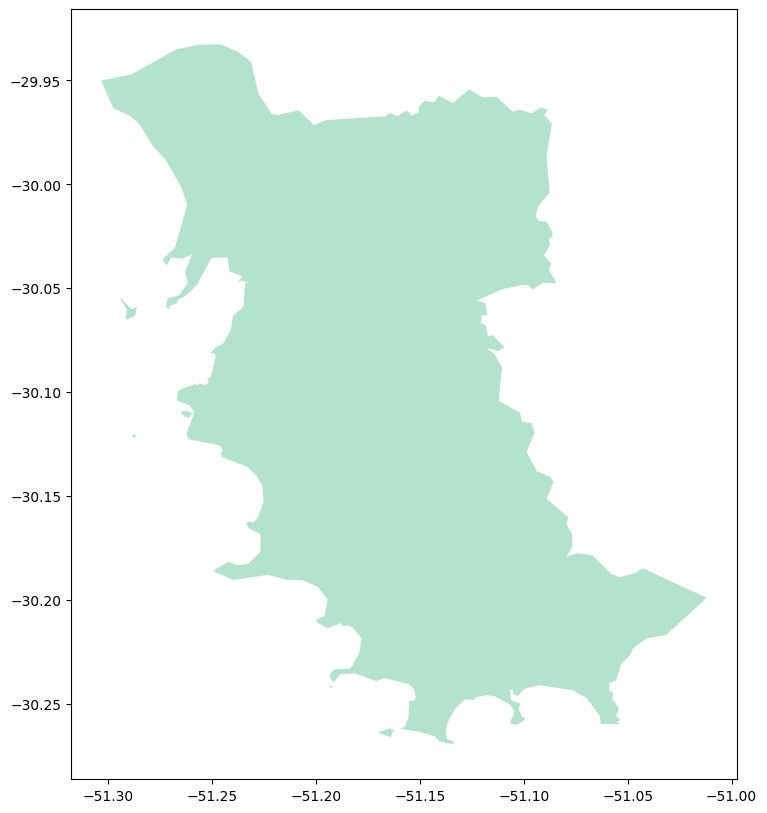

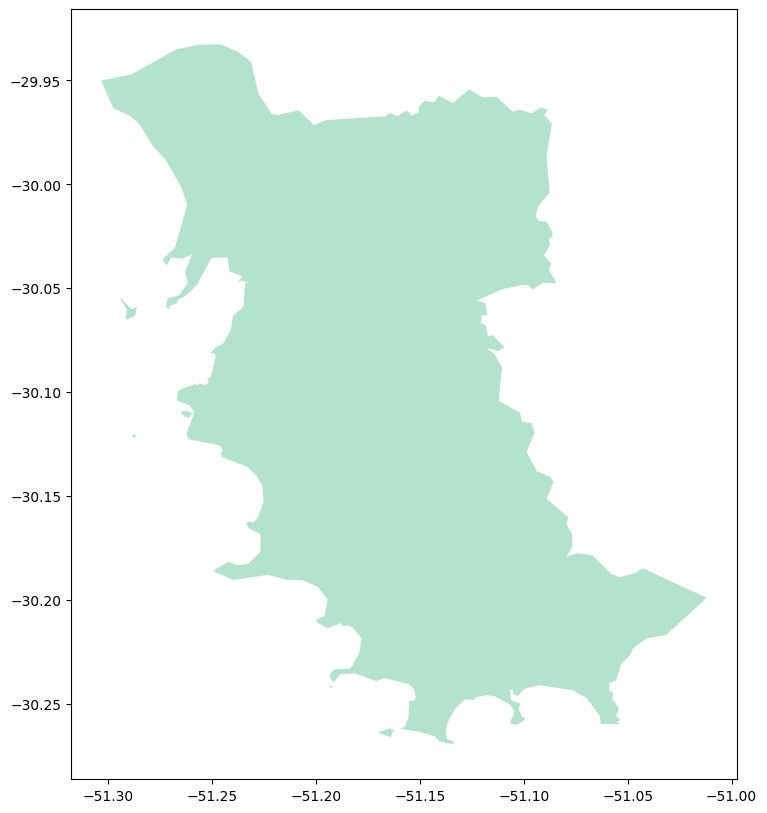

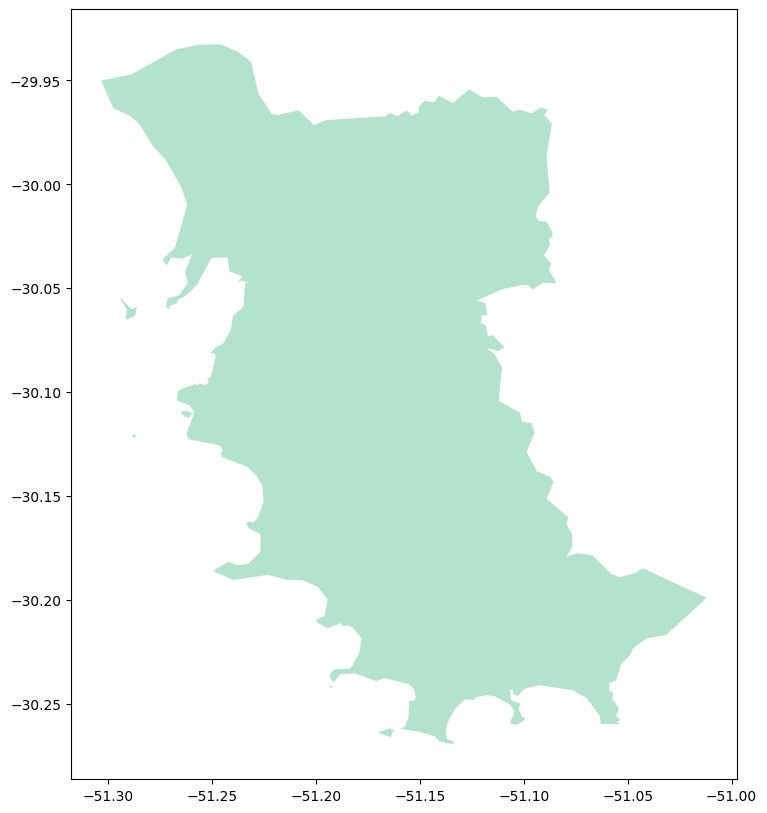

In [35]:
print(poa_JB_Temp)

for i in range(len(poa_JB_Temp)):
    gdf_muni['Temp. Max. (C)'] = poa_JB_Temp[i]
    fig, ax = plt.subplots(figsize=(10, 10))
    gdf_muni.plot(column='Temp. Max. (C)', cmap='Pastel2', ax=ax, zorder=5)



<AxesSubplot: title={'center': 'test'}, xlabel='Longitud', ylabel='Latitud'>

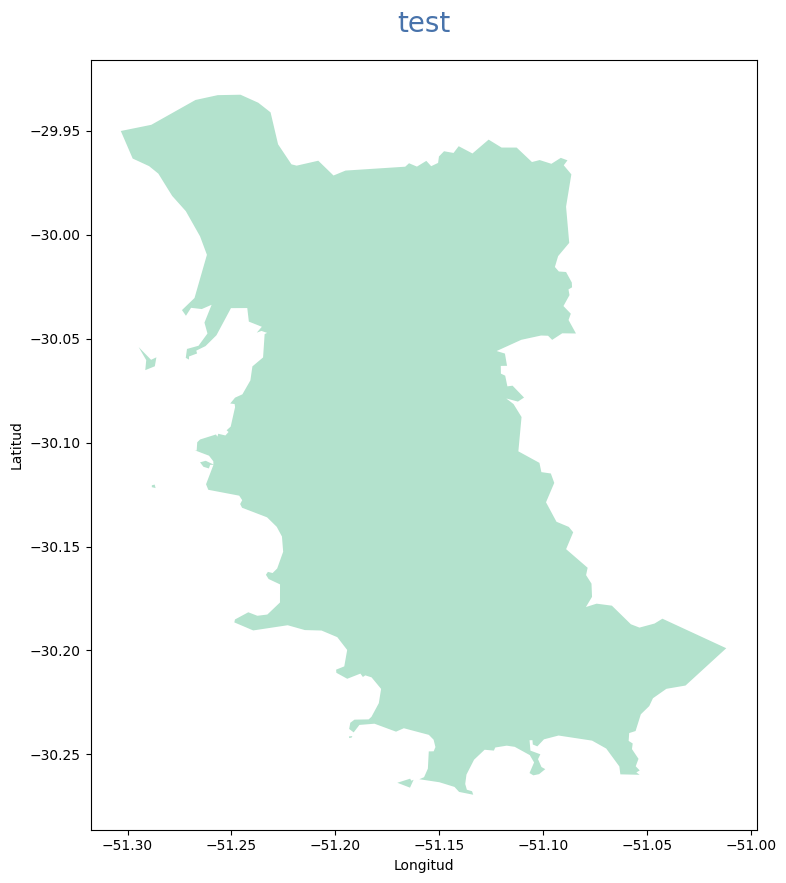

In [36]:
# Control del tamaño de la figura del mapa
fig, ax = plt.subplots(figsize=(10, 10))
 
# Control del título y los ejes
ax.set_title('test', pad = 20, fontdict={'fontsize':20, 'color': '#4873ab'})
ax.set_xlabel('Longitud')
ax.set_ylabel('Latitud')
 
# Mostrar el mapa finalizado
#gdf_muni.plot(column='26.2', cmap='plasma', ax=ax, zorder=5)
gdf_muni.plot(column='Temp. Max. (C)', cmap='Pastel2', ax=ax, zorder=5)



**Informacion base**

In [37]:
# Defininfo o sistema de projeção
gdf_muni.crs = 'EPSG:4326'
gdf_muni.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [38]:
# Unidades de conversão
uc_gdf = geobr.read_conservation_units(date=201909, simplified=True, verbose=False)
uc_gdf.head()

,code_conservation_unit,name_conservation_unit,id_wcm,category,group,government_level,creation_year,gid7,quality,legislation,dt_ultim10,code_u111,name_organization,date,geometry
0,2350,RESERVA PARTICULAR DO PATRIMÔNIO NATURAL BUGIO...,None,Reserva Particular do Patrimônio Natural,US,estadual,2010,6101,Aproximado (O poligono representa uma estimati...,Outros nº 74-S de 22/02/2010,31/08/2012,0000.32.2350,Instituto Estadual de Meio Ambiente e Recursos...,201909.0,"MULTIPOLYGON (((-40.96875 -20.06128, -40.96906..."
1,3787,AREA DE PROTECAO AMBIENTAL DA BACIA DO CORREGO...,None,Área de Proteção Ambiental,US,municipal,2018,15289,Correto (O poligono corresponde ao memorial de...,Decreto nº 051/2018 de 20/09/2018,20/09/2018,1480.52.3787,Secretaria Municipal de Meio Ambiente de Nova ...,201909.0,"MULTIPOLYGON (((-48.25389 -18.04416, -48.25640..."
2,3445,RESERVA PARTICULAR DO PATRIMÔNIO NATURAL PILAR,None,Reserva Particular do Patrimônio Natural,US,estadual,2013,13500,Correto (O poligono corresponde ao memorial de...,Portaria nº 466 de 27/06/2013,10/07/2017,0000.33.3445,Instituto Estadual do Ambiente do Rio de Janeiro,201909.0,"MULTIPOLYGON (((-42.79637 -22.86341, -42.79632..."
3,145,PARQUE NACIONAL DA SERRA DA CAPIVARA,64,Parque,PI,federal,1979,6506,Aproximado (O poligono representa uma estimati...,Decreto nº 83548 de 05/06/1979,27/09/2007,0000.00.0145,Instituto Chico Mendes de Conservação da Biodi...,201909.0,"MULTIPOLYGON (((-42.57484 -8.57399, -42.57355 ..."
4,1754,FLORESTA ESTADUAL DO ARAGUAIA,None,Floresta,US,estadual,2002,2983,Correto (O poligono corresponde ao memorial de...,Decreto nº 5.630 de 07/08/2002,06/08/2009,0000.52.1754,Secretaria Estadual do Meio Ambiente e dos Rec...,201909.0,"MULTIPOLYGON (((-50.58059 -13.21449, -50.57208..."


In [39]:
uc_gdf.crs = 'EPSG:4326'
uc_gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [40]:
# Conferindo os sistemas
uc_gdf.crs == gdf_muni.crs

True

In [41]:
# Filtrando os dados de POA
uc_gdf_poa = gpd.sjoin(uc_gdf, gdf_muni)
uc_gdf_poa

,code_conservation_unit,name_conservation_unit,id_wcm,category,group,government_level,creation_year,gid7,quality,legislation,dt_ultim10,code_u111,name_organization,date,geometry,index_right,code_muni,name_muni,code_state,abbrev_state,name_state,code_region,name_region,Temp. Max. (C)
283,1987,ÁREA DE PROTEçãO AMBIENTAL ESTADUAL DELTA DO J...,None,Área de Proteção Ambiental,US,estadual,2005,12758,Correto (O poligono corresponde ao memorial de...,Lei ordinária nº 12371 de 14/11/2005,30/05/2019,0000.43.1987,Secretaria do Ambiente e Desenvolvimento Suste...,201909.0,"MULTIPOLYGON (((-51.41519 -29.99295, -51.42657...",325,4314902.0,Porto Alegre,43.0,RS,Rio Grande do Sul,4.0,Sul,28.7
1110,2000,PARQUE ESTADUAL DO DELTA DO JACUí,None,Parque,PI,estadual,1976,15176,Aproximado (O poligono representa uma estimati...,Decreto nº 24385 de 30/01/1976,03/06/2019,0000.43.2000,Secretaria do Ambiente e Desenvolvimento Suste...,201909.0,"MULTIPOLYGON (((-51.23399 -29.99172, -51.22767...",325,4314902.0,Porto Alegre,43.0,RS,Rio Grande do Sul,4.0,Sul,28.7
1418,3400,PARQUE NATURAL MUNICIPAL SAINT HILAIRE,None,Parque,PI,municipal,2015,13706,Aproximado (O poligono representa uma estimati...,Decreto nº 051/2015 de 15/06/2015,30/08/2017,2300.43.3400,Secretaria Municipal de Meio Ambiente de Viamã...,201909.0,"MULTIPOLYGON (((-51.10433 -30.08076, -51.10144...",325,4314902.0,Porto Alegre,43.0,RS,Rio Grande do Sul,4.0,Sul,28.7
1615,2195,RESERVA PARTICULAR DO PATRIMÔNIO NATURAL RINCÃ...,None,Reserva Particular do Patrimônio Natural,US,federal,2010,10081,Correto (O poligono corresponde ao memorial de...,Portaria nº 52 de 13/07/2010,26/08/2011,0000.00.2195,Instituto Chico Mendes de Conservação da Biodi...,201909.0,"MULTIPOLYGON (((-51.10153 -30.17197, -51.09979...",325,4314902.0,Porto Alegre,43.0,RS,Rio Grande do Sul,4.0,Sul,28.7


<AxesSubplot: >

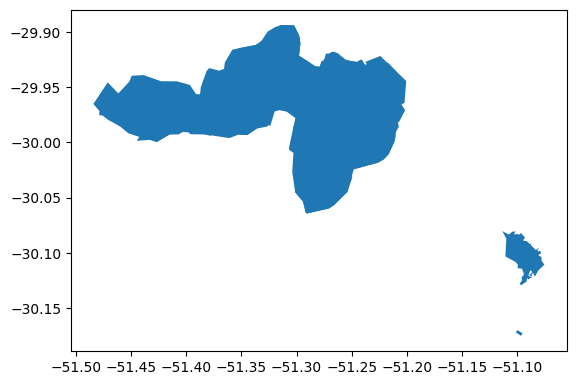

In [42]:
uc_gdf_poa.plot()

Text(0.5, 1.0, 'Unidades de conversao \n Porto Alegre - RS')

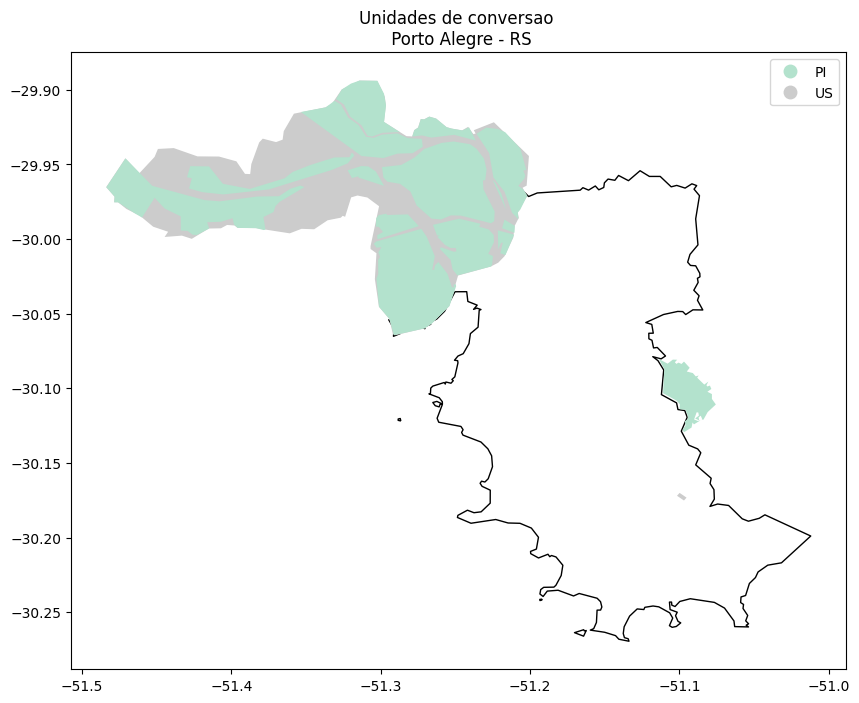

In [43]:
fig, ax = plt.subplots(figsize=(10,10))
base = gdf_muni.plot(ax=ax, color='white', edgecolor='black')
uc_gdf_poa.plot(ax=base, column='group', legend=True, cmap='Pastel2')
ax.set_title('Unidades de conversao \n Porto Alegre - RS')